In [ ]:
%%capture
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation,rc
from IPython.display import HTML
import matplotlib.cm as cm


# To make an animation, we need ffmpeg
!apt update && apt install ffmpeg

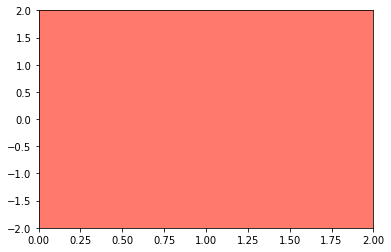

In [ ]:
fig,ax = plt.subplots()

ax.set_xlim((0,2))
ax.set_ylim((-2,2))
ax.grid(False)
ax.set_facecolor('xkcd:salmon')

line, = ax.plot([],[],lw=2)
gradient = np.linspace(0, 1, 101)

## Funciones de animación

Primero crearemos dos funciones. La función *init* siempre es igual. La función *animate(i)* será la que decida qué datos se graficarán en el *i-ésimo* cuadro de animación. 

En este momento la función que graficaremos será: 

> $f(x)= \sin(2\pi (x -0.01t))$

Donde $t$ es un desplazamiento.

In [ ]:
def init():
  line.set_data([],[])
  return (line,)

def animate(i):
  x = np.linspace(0,2,1000)
  y=np.sin(2*np.pi*(x-0.01*i))
  line.set_data(x,y)
  line.set_fillstyle("bottom")
  line.set_color(cm.jet(gradient[i]))
  return(line,)

## Creación de la animación
Con la siguiente función se creará la animación. Ahí se especifica cuántos cuadros (frames), y cuántos milisegundos entre cada cuadro (interval).

In [ ]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)
# blit Sólo redibuja los cambios

## Mostrar como widget interactivo
Para mostrarlo como widget iteractivo es tan sencillo como invocar la función adecuada:

In [ ]:
HTML(anim.to_jshtml())


## Mostrar como animación
En este caso se presentará la gráfica como película animada.

In [ ]:
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg' # For google colab

HTML(anim.to_html5_video())



## Guardar la gráfica
Se guardará localmente como archivo de película.   
También se pueda simplemente dar click derecho sobre la animación para guardarla.


In [ ]:
e
from matplotlib.animation import FFMpegWriter
samples = np.array([])
writer = FFMpegWriter(fps=15)

from google.colab import files
files.download( "movie.mp4" );  

NameError: ignored

### Scatter Plot

In [ ]:

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera

numpoints = 10
points = np.random.random((2, numpoints))
colors = cm.rainbow(np.linspace(0, 1, numpoints))
camera = Camera(plt.figure())
for _ in range(100):
    points += 0.1 * (np.random.random((2, numpoints)) - .5)
    plt.scatter(*points, c=colors, s=100)
    camera.snap()
anim = camera.animate(blit=True)
anim.save('scatter.mp4')


ModuleNotFoundError: ignored

In [ ]:
def init():
  line.set_data([],[])
  return (line,)

def animate(i):
  N = 50
  x = np.random.rand(N)
  y = np.random.rand(N)
  colors = np.random.rand(N)
  area = (30 * np.random.rand(N))**2  # 0 to 15 point radi

  line.set_data(x,y)
  line.set_fillstyle("bottom")
  line.set_color(cm.jet(gradient[i]))
  return(line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

HTML(anim.to_jshtml())


## Línea de barrido

In [ ]:
%%capture
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation,rc
from IPython.display import HTML
import matplotlib.cm as cm
!apt update && apt install ffmpeg



<class 'matplotlib.lines.Line2D'>
<class 'matplotlib.collections.PathCollection'>


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 1746, in _init_draw
    self._drawn_artists = self._init_func()
  File "<ipython-input-12-838148650f9e>", line 24, in init
    line.set_data([],[])
AttributeError: 'PathCollection' object has no attribute 'set_data'


AttributeError: ignored

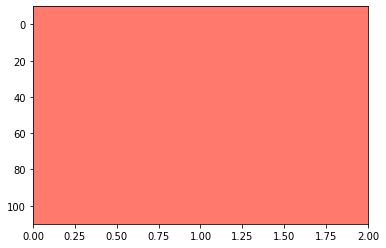

In [ ]:
fig,ax = plt.subplots()

ax.set_xlim((0,2))
ax.set_ylim((110,-10))
ax.grid(False)
ax.set_facecolor('xkcd:salmon')

line, = ax.plot([],[],lw=2)
points = ax.scatter((5),(5), s=(5))
gradient = np.linspace(0, 1, 121)

lines = []
for i in range(2):
  line, = ax.plot([],[],lw=2)
  lines.append(line)

lines.append(points)

print(type(lines[0]))
print(type(points))

def init():
  for line in lines:
    line.set_data([],[])
  return (lines)

def animate(i):
  x = np.linspace(0,2,1000)
  y=110-i
  lines[0].set_data(x,y)
  lines[0].set_fillstyle("bottom")
  lines[0].set_color(cm.jet(gradient[i]))

  y2=i-10
  lines[1].set_data(x,y2)
  lines[1].set_fillstyle("bottom")
  lines[1].set_color(cm.jet(gradient[i]))

  return(lines)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=120, interval=20, 
                               blit=True)
# blit Sólo redibuja los cambio

HTML(anim.to_jshtml())